In [1]:
#Modules for EDA
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

#Modules for ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report

from tensorflow import keras
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\final-v1.csv')
df.shape

(785, 13)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edge_followed_by      785 non-null    float64
 1   edge_follow           785 non-null    float64
 2   username_length       785 non-null    int64  
 3   username_has_number   785 non-null    int64  
 4   full_name_has_number  785 non-null    int64  
 5   full_name_length      785 non-null    int64  
 6   is_private            785 non-null    int64  
 7   is_joined_recently    785 non-null    int64  
 8   has_channel           785 non-null    int64  
 9   is_business_account   785 non-null    int64  
 10  has_guides            785 non-null    int64  
 11  has_external_url      785 non-null    int64  
 12  is_fake               785 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 79.9 KB


In [4]:
df.head()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url,is_fake
0,0.001,0.257,13,1,1,13,0,0,0,0,0,0,1
1,0.000,0.958,9,1,0,0,0,1,0,0,0,0,1
2,0.000,0.253,12,0,0,0,0,0,0,0,0,0,1
3,0.000,0.977,10,1,0,0,0,0,0,0,0,0,1
4,0.000,0.321,11,0,0,11,1,0,0,0,0,0,1


In [5]:
df.describe()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url,is_fake
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.0,785.000000,785.000000,785.000000,785.000000
mean,0.002223,0.401606,11.630573,0.644586,0.109554,6.129936,0.184713,0.361783,0.0,0.073885,0.001274,0.062420,0.881529
std,0.036105,0.293845,3.284329,0.478944,0.312532,6.943903,0.388312,0.480823,0.0,0.261751,0.035692,0.242072,0.323371
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.135000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.336000,11.000000,1.000000,0.000000,5.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.623000,13.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,26.000000,1.000000,1.000000,30.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [6]:
df['has_channel'].sum()

0

In [7]:
df.drop('has_channel',axis=1,inplace=True)
df.shape

(785, 12)

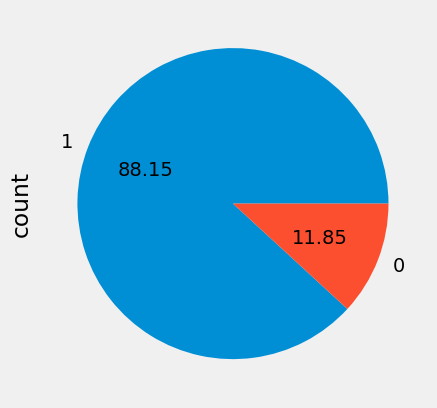

In [8]:
df['is_fake'].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

In [9]:
binary_cols = ['username_has_number','full_name_has_number','is_private','is_joined_recently','is_business_account','has_guides','has_external_url']

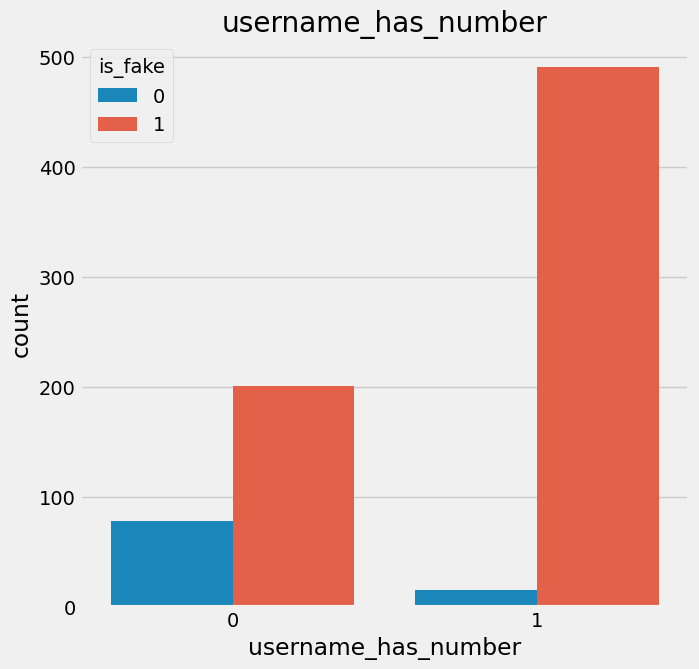

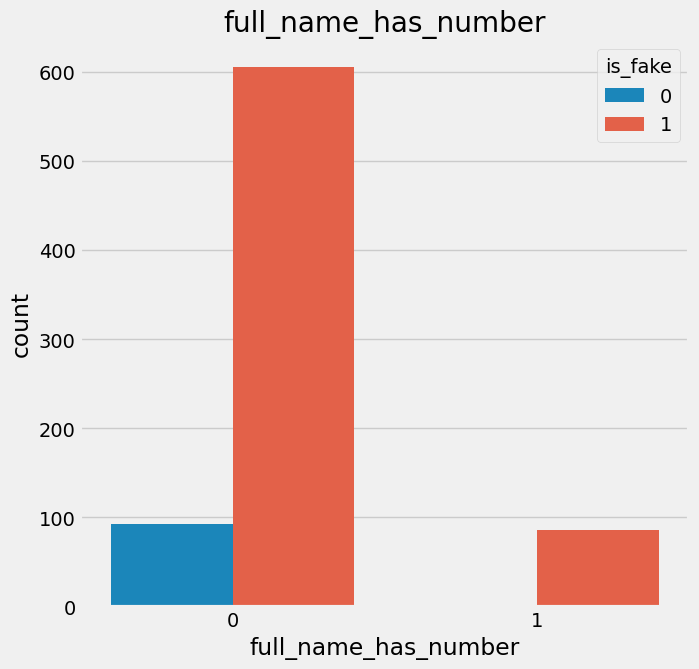

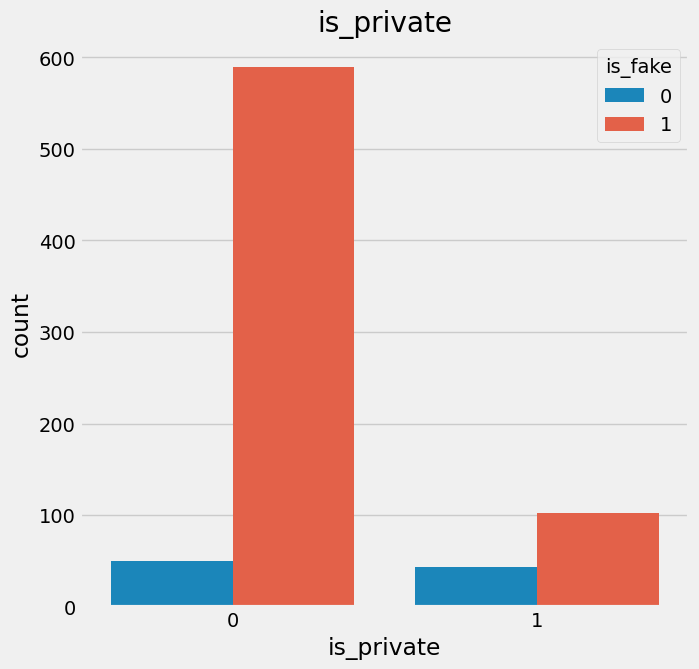

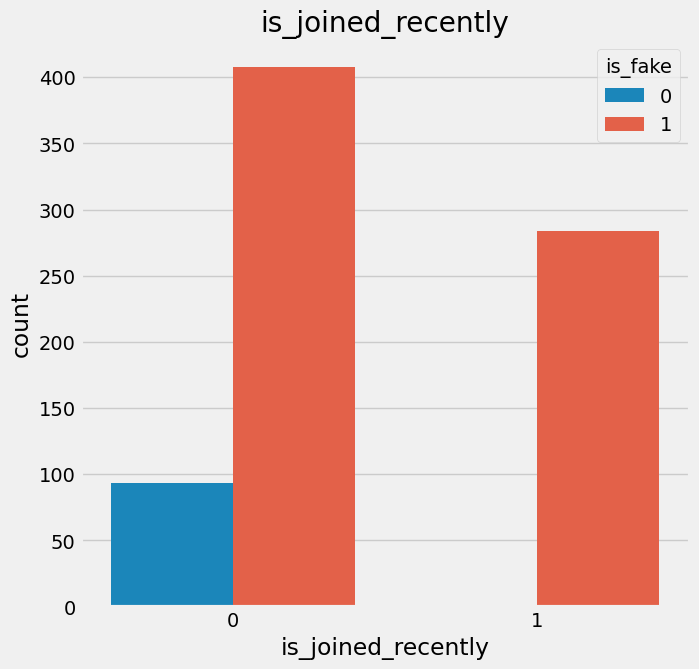

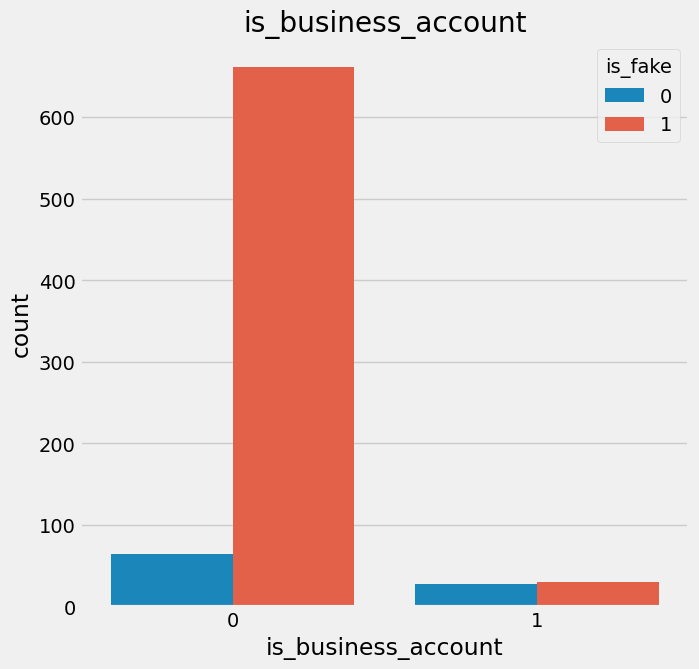

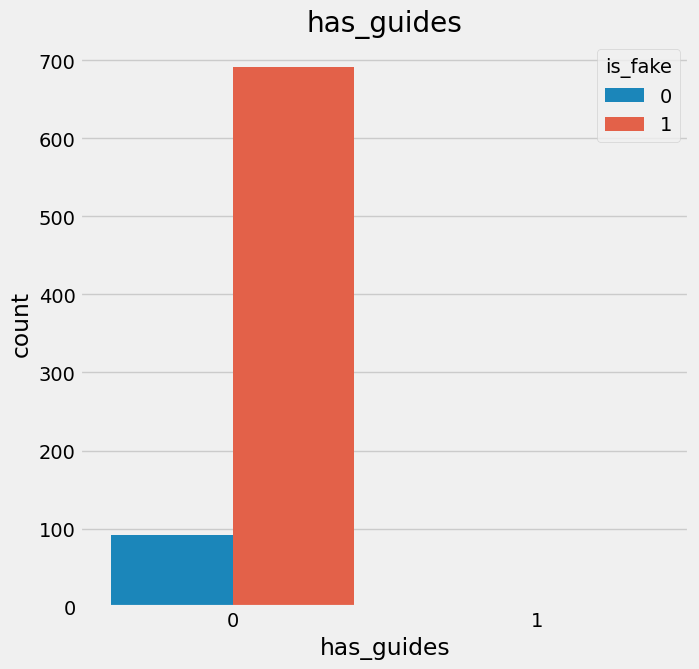

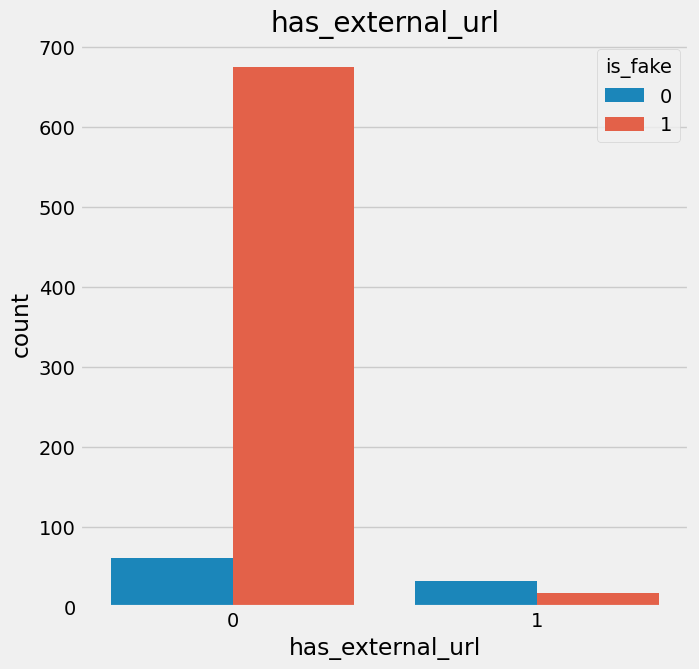

In [10]:
for b_col in binary_cols:
    plt.figure(figsize=(7,7))
    sns.countplot(data=df[[b_col,'is_fake']],x=b_col,hue='is_fake')
    plt.title(b_col)
    plt.show()
    print('\n')

In [11]:
other_cols = ['edge_followed_by','edge_follow','username_length','full_name_length']

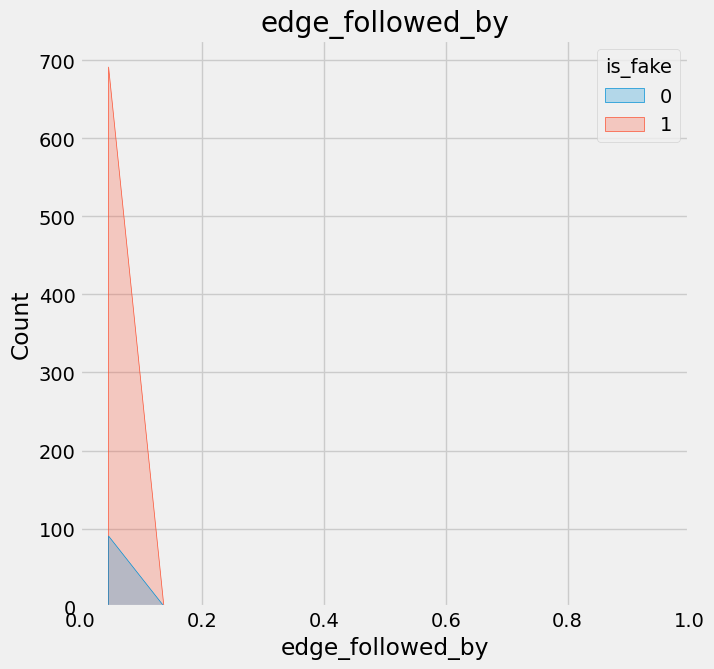

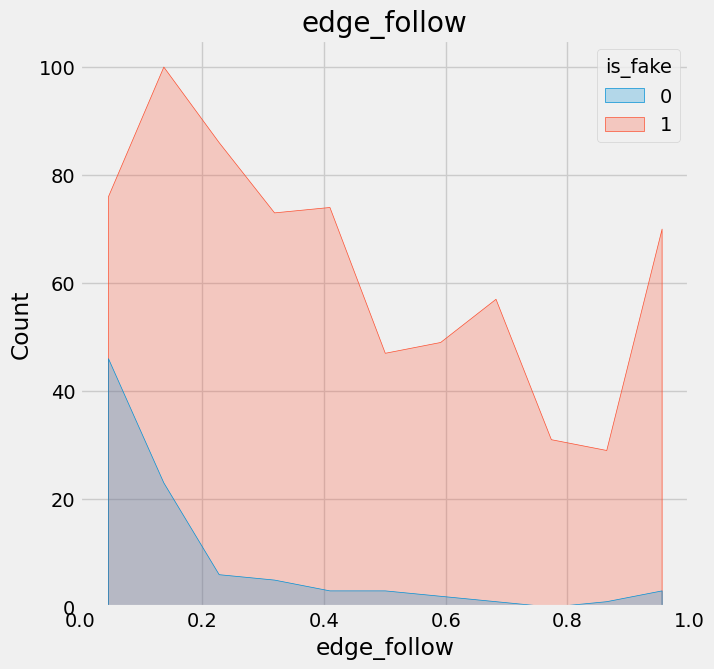

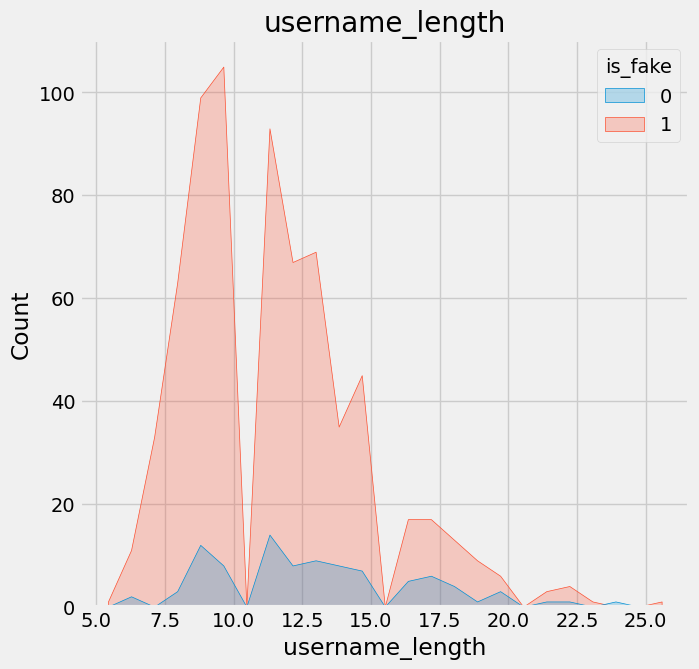

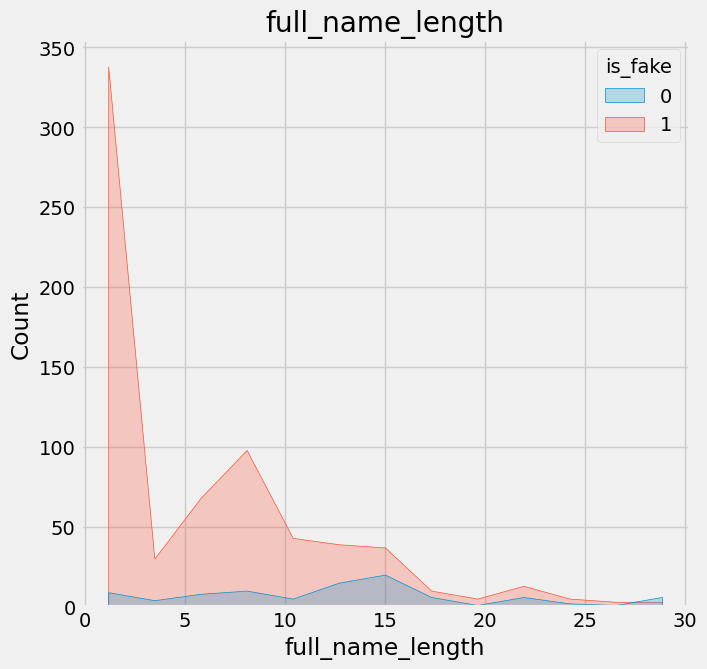

In [12]:
for col in other_cols:
    plt.figure(figsize=(7,7))
    sns.histplot(data=df[[col,'is_fake']],x=col,hue='is_fake',element='poly')
    plt.title(col)
    plt.show()
    print('\n')

<Figure size 700x700 with 0 Axes>

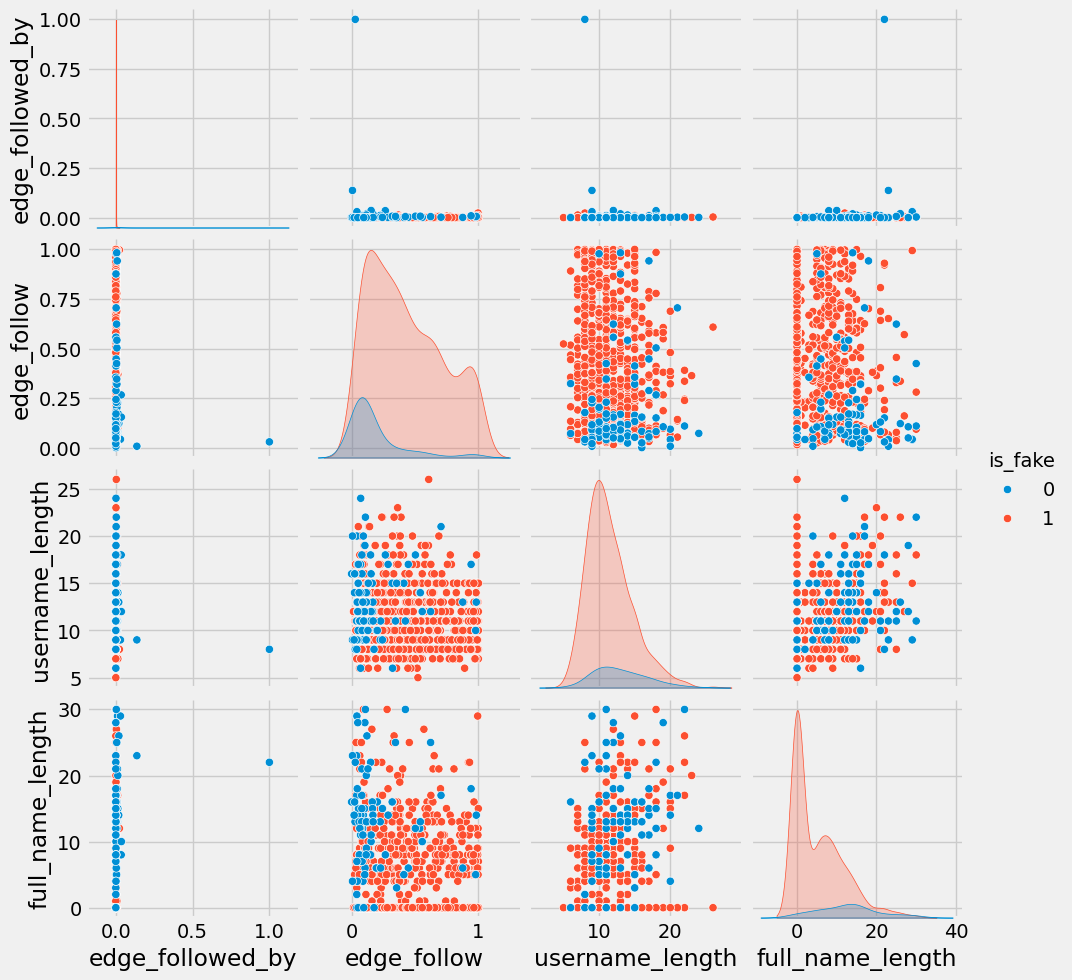

In [13]:
plt.figure(figsize=(7,7))
sns.pairplot(df[other_cols+['is_fake']],hue='is_fake')
plt.show()

In [14]:
df.describe()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,is_business_account,has_guides,has_external_url,is_fake
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000
mean,0.002223,0.401606,11.630573,0.644586,0.109554,6.129936,0.184713,0.361783,0.073885,0.001274,0.062420,0.881529
std,0.036105,0.293845,3.284329,0.478944,0.312532,6.943903,0.388312,0.480823,0.261751,0.035692,0.242072,0.323371
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.135000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.336000,11.000000,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.623000,13.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,26.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
cols_to_scale = ['username_length','full_name_length']

In [16]:
scale = MinMaxScaler()
scalled = scale.fit_transform(df[cols_to_scale])

df['username_length'],df['full_name_length'] = scalled[:,0],scalled[:,1]

In [17]:
df.head()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,is_business_account,has_guides,has_external_url,is_fake
0,0.001,0.257,0.380952,1,1,0.433333,0,0,0,0,0,1
1,0.000,0.958,0.190476,1,0,0.000000,0,1,0,0,0,1
2,0.000,0.253,0.333333,0,0,0.000000,0,0,0,0,0,1
3,0.000,0.977,0.238095,1,0,0.000000,0,0,0,0,0,1
4,0.000,0.321,0.285714,0,0,0.366667,1,0,0,0,0,1


In [18]:
X,Y = df.drop('is_fake',axis=1),df['is_fake']
X.shape,Y.shape

((785, 11), (785,))

In [19]:
smote = SMOTE(sampling_strategy='minority')
X,Y = smote.fit_resample(X,Y)
X.shape,Y.shape

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


((1384, 11), (1384,))

In [20]:
xydf = pd.concat([X,Y],axis=1)
xydf.shape

(1384, 12)

<Figure size 700x700 with 0 Axes>

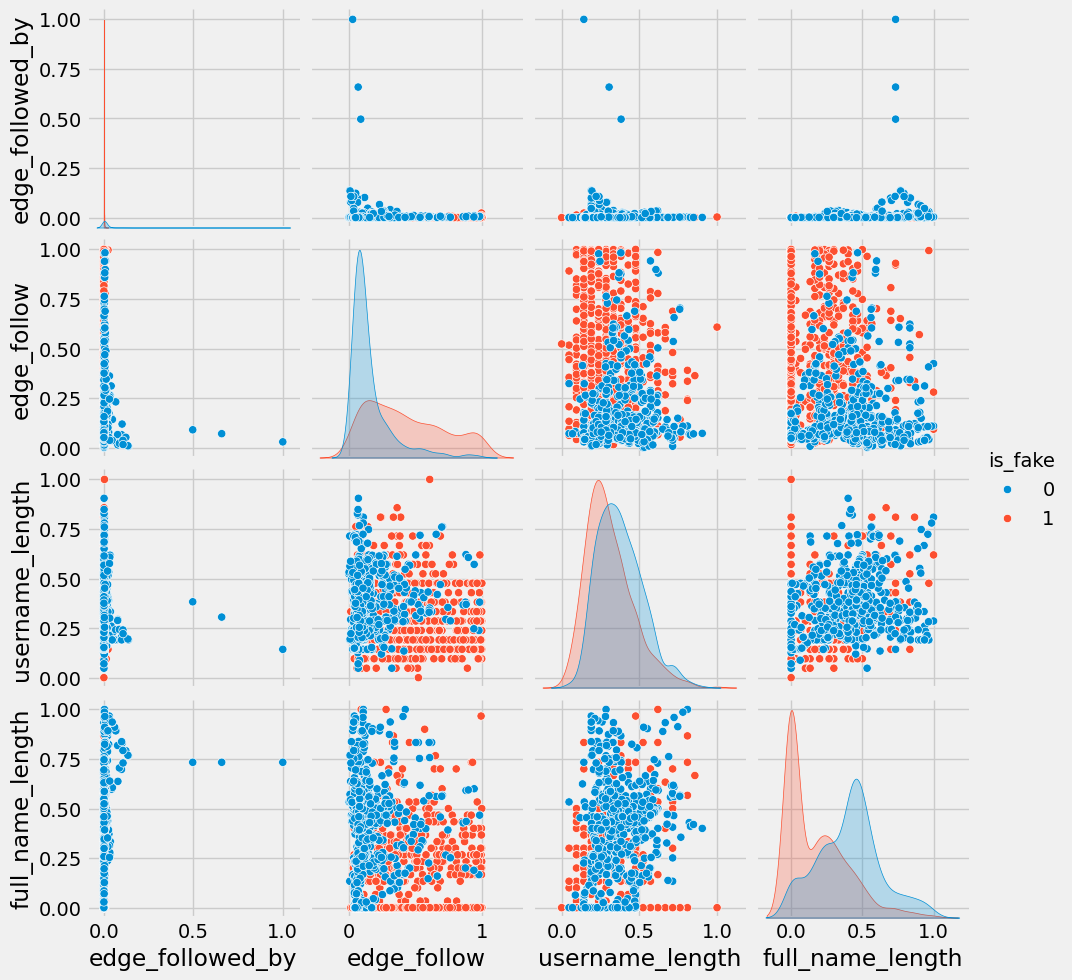

In [21]:
plt.figure(figsize=(7,7))
sns.pairplot(xydf[other_cols+['is_fake']],hue='is_fake')
plt.show()

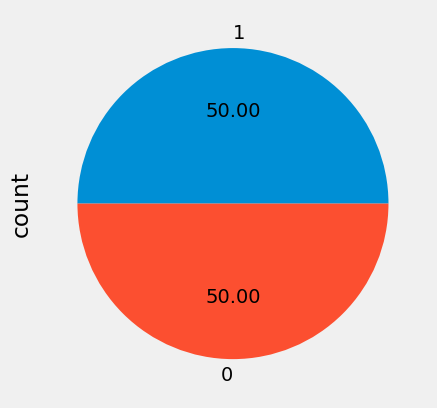

In [22]:
Y.value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1038, 11), (346, 11), (1038,), (346,))

In [24]:
model = keras.Sequential([
    keras.layers.Dense(11,input_shape=(11,),activation='relu'),
    keras.layers.Dense(2,activation='softmax'),
    
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.fit(x_train,y_train,epochs=100)

AttributeError: module 'ml_dtypes' has no attribute 'float8_e3m4'
Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3125 - loss: 0.8882 
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3917 - loss: 0.7680
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6630 - loss: 0.6733
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8249 - loss: 0.5979
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8575 - loss: 0.5279
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8837 - loss: 0.4675
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8866 - loss: 0.4245
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8902 - loss: 0.3853
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8968 - loss: 0.3479
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8895 - loss: 0.3180
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8947 - loss: 0.3

In [26]:
model.evaluate(x_test,y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9251 - loss: 0.2053  


[0.24983832240104675, 0.9075144529342651]

In [27]:
y_test_predict = [np.argmax(i) for i in model.predict(x_test)]
y_test_cm = confusion_matrix(y_test,y_test_predict)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


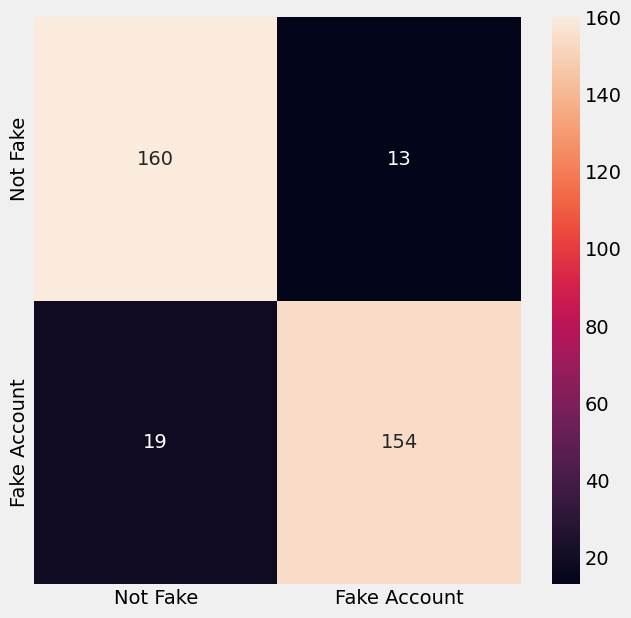

In [28]:
plt.figure(figsize=(7,7))
sns.heatmap(y_test_cm,annot=True,fmt='g',xticklabels=['Not Fake','Fake Account'],yticklabels=['Not Fake','Fake Account'])
plt.show()

In [31]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       173
           1       0.92      0.89      0.91       173

    accuracy                           0.91       346
   macro avg       0.91      0.91      0.91       346
weighted avg       0.91      0.91      0.91       346



In [32]:
y_train_predict = [np.argmax(i) for i in model.predict(x_train)]
y_train_cm = confusion_matrix(y_train,y_train_predict)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


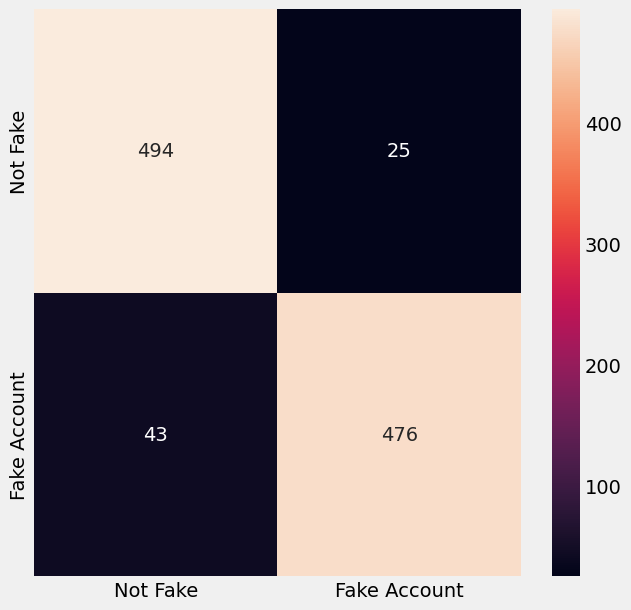

In [33]:
plt.figure(figsize=(7,7))
sns.heatmap(y_train_cm,annot=True,fmt='g',xticklabels=['Not Fake','Fake Account'],yticklabels=['Not Fake','Fake Account'])
plt.show()

In [34]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       519
           1       0.95      0.92      0.93       519

    accuracy                           0.93      1038
   macro avg       0.94      0.93      0.93      1038
weighted avg       0.94      0.93      0.93      1038

